In [7]:
from datetime import datetime
import pandas as pd
import numpy as np
file = 'D:/data/E012/E012 2021 54.csv'#10th5028096-1003_2035有缺失值，10th5495048-1004_3598有离群点
df = pd.read_csv(file, index_col='time',low_memory=False)
df.index = pd.to_datetime(df.index).tz_localize(None)
df = df.resample('S').asfreq()
df=df.apply(pd.to_numeric, errors='ignore')
df[df['in_Sheet_thickness']>5] = np.nan
df[df['in_Sheet_thickness']<=0] = np.nan

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler
list = [2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19]
df.iloc[:, list]= StandardScaler().fit_transform(df.iloc[:, list])# 数值类型特征标准化
L = df.iloc[:, list]
L_imputed=df.iloc[:, list]
L_imputed.fillna(method='ffill', inplace=True)
L_imputed

D:\Anaconda3\envs\darts\lib\site-packages\pandas\core\frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,out_Cap_offset,out_Electrode_force,out_Electrode_position,out_force_build_up,C_Cylinder_force,W_Friction,W_Maximum_aperture,W_Maximum_electrode_force,W_Start_friction,W_Welding_point_count,W_position_count,in_Counterbalance_pressure,in_Electrode_force,in_Electrode_position,in_Sheet_thickness,in_Velocity,in_force_build_up
time,,,,,,,,,,,,,,,,,
2021-08-26 11:13:44,-0.486880,-0.337290,0.516657,-0.373097,-0.300420,0.183276,0.0,0.0,0.0,-1.763101,-1.762926,0.421256,0.227421,0.457547,0.365667,0.0,-0.421246
2021-08-26 11:13:45,-0.486880,-0.336030,0.516657,-0.373097,-0.283586,0.183276,0.0,0.0,0.0,-1.763101,-1.762926,0.421256,0.227421,0.457547,0.365667,0.0,-0.421246
2021-08-26 11:13:46,-0.486880,-0.312088,0.516657,-0.373097,-0.275817,0.183276,0.0,0.0,0.0,-1.763101,-1.762926,0.421256,0.227421,0.457547,0.365667,0.0,-0.421246
2021-08-26 11:13:47,-0.486880,-0.336030,0.516657,-0.373097,-0.306894,0.183276,0.0,0.0,0.0,-1.763101,-1.762926,0.421256,0.227421,0.457547,0.365667,0.0,-0.421246
2021-08-26 11:13:48,-0.486880,-0.328469,0.516657,-0.373097,-0.283586,0.183276,0.0,0.0,0.0,-1.763101,-1.762926,0.421256,0.227421,0.457547,0.365667,0.0,-0.421246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-02 11:23:40,1.006585,-0.494804,-1.358261,-0.373097,-0.486880,-0.463315,0.0,0.0,0.0,1.934235,1.932934,0.421256,-0.617860,-2.087082,-2.734728,0.0,-0.421246
2021-09-02 11:23:41,1.006585,-0.168435,-2.086385,-0.373097,2.368301,-0.463315,0.0,0.0,0.0,1.934288,1.932960,-2.373862,-0.617860,-2.087082,-2.734728,0.0,2.373911
2021-09-02 11:23:42,1.006585,2.403455,-2.151396,2.680265,2.394199,-0.463315,0.0,0.0,0.0,1.934288,1.932960,-2.373862,-0.617860,-2.087082,-2.734728,0.0,2.373911


ValueError: Axis limits cannot be NaN or Inf

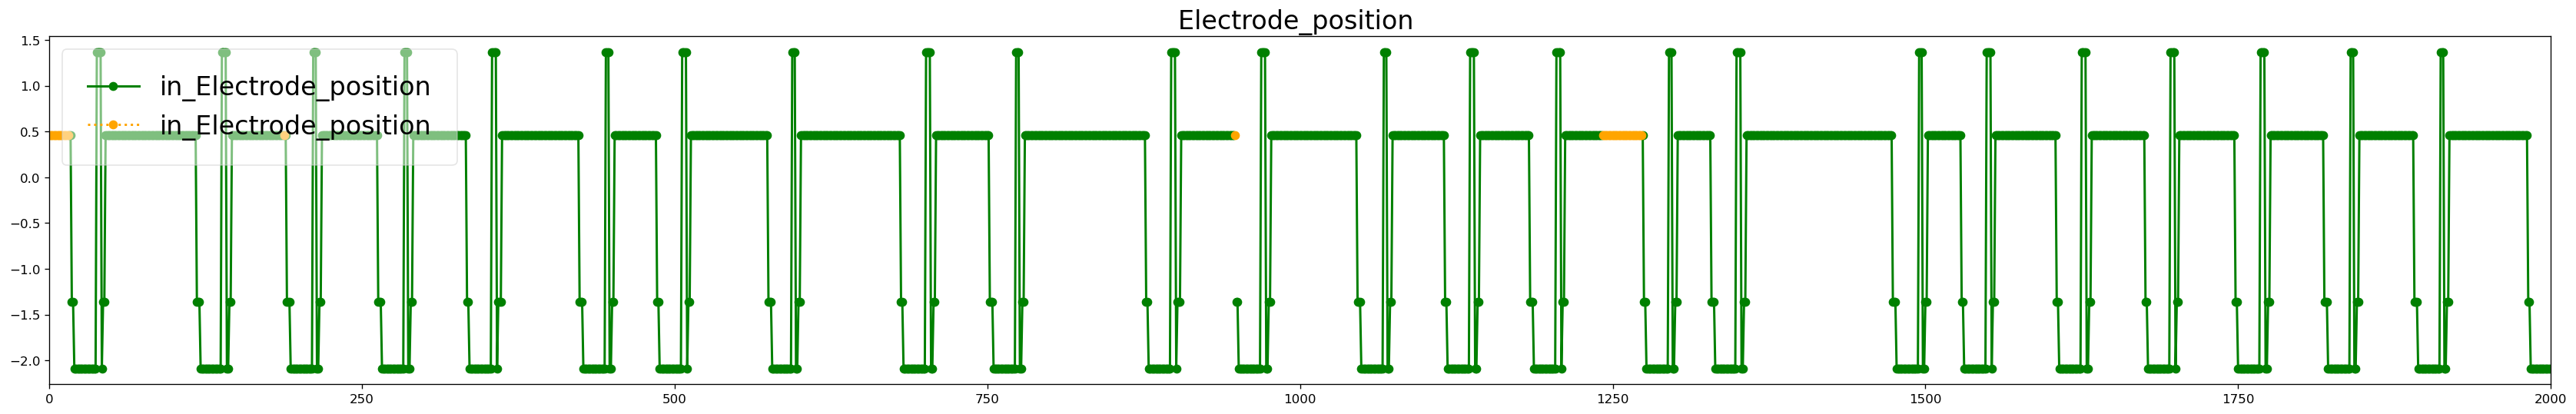

In [9]:
# 可视化，蓝色和绿色代表原始数据中存在的数据，红色和橙色为后填补的数据。
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(35, 17), dpi=120)

    # ============
    # First plot
    # ============

ax = fig.add_subplot(3, 1, 1)
# # # Plot Line1
# ax.plot(L.iloc[0:300, :].out_Electrode_force.tolist(), 'o-',
#             color='blue', linewidth=1.8, markersize=6, label='out_Electrode_force')
# ax.plot(L_imputed[L.isnull()].iloc[0:300, :].out_Electrode_force.tolist(), 'o',
#             color='r', linewidth=1.8, markersize=6, label='out_Electrode_force',linestyle='dotted')

ax.plot(L.iloc[-2000:,:].in_Electrode_position.tolist(), 'o-',
            color='green', linewidth=1.8, markersize=6, label='in_Electrode_position')
ax.plot(L_imputed[L.isnull()].iloc[-2000:, :].in_Electrode_position.tolist(), 'o',
            color='orange', linewidth=1.8, markersize=6, label='in_Electrode_position',linestyle='dotted')

    
ax.legend(frameon=True,  # legend border
              framealpha=.5,  # transparency of border
              ncol=1,  # num columns
              # shadow=True,  # shadow on
              borderpad=1,  # thickness of border
              fontsize=20,
              loc=2
              )
ax.set_title('Electrode_position ', fontsize=20)
ax.set_xlim(0, len(L.iloc[-2000:, :].out_Electrode_position.tolist()))
ax.set_ylim(min(L.iloc[-2000:, :].out_Electrode_position.tolist())-1, max(L.iloc[-2000:, :].out_Electrode_position.tolist())+1)
ax.set_xlabel('x:index', fontsize=20)  # x label
ax.set_ylabel('y:Electrode_position', fontsize=20)  # y label
ax.grid(True)


    # ============
    # Second plot
    # ============

ax = fig.add_subplot(3, 1, 2)
# # # Plot Line1
ax.plot(L.iloc[-2000:, :].out_Electrode_position.tolist(), 'o-',
            color='blue', linewidth=1.8, markersize=6, label='out_Electrode_position')
ax.plot(L_imputed[L.isnull()].iloc[-2000:, :].out_Electrode_position.tolist(), 'o',
            color='r', linewidth=1.8, markersize=6, label='out_Electrode_position',linestyle='dotted')



    
ax.legend(frameon=True,  # legend border
              framealpha=.5,  # transparency of border
              ncol=1,  # num columns
              # shadow=True,  # shadow on
              borderpad=1,  # thickness of border
              fontsize=20,
              loc=2
              )
ax.set_title('Electrode_position ', fontsize=20)
ax.set_xlim(0, len(L.iloc[-2000:, :].out_Electrode_position.tolist()))
ax.set_ylim(min(L.iloc[-2000:, :].out_Electrode_position.tolist())-1, max(L.iloc[-2000:, :].out_Electrode_position.tolist())+1)
ax.set_xlabel('x:index', fontsize=20)  # x label
ax.set_ylabel('y:Electrode_position', fontsize=20)  # y label
ax.grid(True)

    # ============
    # third plot
    # ============

ax = fig.add_subplot(3, 1, 3)
# # # Plot Line1
ax.plot(L.iloc[-2000:, :].in_Sheet_thickness.tolist(), 'o-',
            color='blue', linewidth=1.8, markersize=6, label='in_Sheet_thickness')
ax.plot(L_imputed[L.isnull()].iloc[-2000:, :].in_Sheet_thickness.tolist(), 'o',
            color='r', linewidth=1.8, markersize=6, label='in_Sheet_thickness',linestyle='dotted')



    
ax.legend(frameon=True,  # legend border
              framealpha=.5,  # transparency of border
              ncol=1,  # num columns
              # shadow=True,  # shadow on
              borderpad=1,  # thickness of border
              fontsize=20,
              loc=2
              )
ax.set_title('in_Sheet_thickness ', fontsize=20)
ax.set_xlim(0, len(L.iloc[-2000:, :].in_Sheet_thickness.tolist()))
ax.set_ylim(min(L.iloc[-2000:, :].in_Sheet_thickness.tolist())-1, max(L.iloc[-2000:, :].in_Sheet_thickness.tolist())+1)
ax.set_xlabel('x:index', fontsize=20)  # x label
ax.set_ylabel('y:in_Sheet_thickness', fontsize=20)  # y label
ax.grid(True)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import scipy.stats as stats

overall_pearson_r = L_imputed.corr().iloc[1,2]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# 输出：使用 Pandas 计算皮尔逊相关结果的 r 值：0.2058774513561943

r, p = stats.pearsonr(L_imputed.dropna()['in_Electrode_force'], L_imputed.dropna()['in_Electrode_position'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# 输出：使用 Scipy 计算皮尔逊相关结果的 r 值：0.20587745135619354，以及 p-value：3.7902989479463397e-51

# 计算滑动窗口同步性
L_imputed.corr()

Pandas computed Pearson r: -0.8278845239859395
Scipy computed Pearson r: 0.02738502094237496 and p-value: 8.8694720903968e-101


,out_Cap_offset,out_Electrode_force,out_Electrode_position,out_force_build_up,C_Cylinder_force,W_Friction,W_Maximum_aperture,W_Maximum_electrode_force,W_Start_friction,W_Welding_point_count,W_position_count,in_Counterbalance_pressure,in_Electrode_force,in_Electrode_position,in_Sheet_thickness,in_Velocity,in_force_build_up
out_Cap_offset,1.000000,0.048903,-0.062894,0.038383,0.059329,0.023424,NaN,NaN,NaN,-0.034447,-0.034447,-0.042946,-0.015055,-0.046844,-0.036211,NaN,0.042914
out_Electrode_force,0.048903,1.000000,-0.827885,0.953485,0.642836,-0.009629,NaN,NaN,NaN,0.036016,0.036041,-0.918525,-0.003829,-0.615285,-0.379249,NaN,0.918624
out_Electrode_position,-0.062894,-0.827885,1.000000,-0.794448,-0.707396,0.026509,NaN,NaN,NaN,-0.040060,-0.040079,0.849235,0.008556,0.877068,0.516182,NaN,-0.849254
out_force_build_up,0.038383,0.953485,-0.794448,1.000000,0.587943,-0.003878,NaN,NaN,NaN,0.032594,0.032616,-0.882495,-0.013493,-0.598633,-0.404325,NaN,0.882585
C_Cylinder_force,0.059329,0.642836,-0.707396,0.587943,1.000000,-0.015391,NaN,NaN,NaN,0.042333,0.042363,-0.732994,-0.006077,-0.607558,-0.365183,NaN,0.732887
W_Friction,0.023424,-0.009629,0.026509,-0.003878,-0.015391,1.000000,NaN,NaN,NaN,0.340595,0.340835,0.005561,0.109144,0.004512,0.003391,NaN,-0.005530
W_Maximum_aperture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W_Maximum_electrode_force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W_Start_friction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W_Welding_point_count,-0.034447,0.036016,-0.040060,0.032594,0.042333,0.340595,NaN,NaN,NaN,1.000000,1.000000,-0.036095,0.058910,-0.040974,-0.031683,NaN,0.036119


与C_Cylinder_force相关的变量(r>0.01）[0,1,2,3,4,5,9,10,11,13,14,16]

In [ ]:
LEN=1200
AHEAD=60
HIS=120
LIST_TAR=[4]
LIST_COVS=[0,1,2,3,4,5,9,10,11,13,14,16]

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.datasets import AirPassengersDataset
from darts.metrics import coefficient_of_variation,mae,mape,marre,mase,mse
data_tar = L_imputed.iloc[-LEN-650:-650, LIST_TAR]
data_covs = L_imputed.iloc[-LEN-650:-650, LIST_COVS]
series_tar = TimeSeries.from_dataframe(data_tar,freq='S').astype(np.float32)
train, test = series_tar[:-AHEAD], series_tar[-AHEAD:]
series_covs = TimeSeries.from_dataframe(data_covs,freq='S').astype(np.float32)
past_covs,future_cosv = series_covs[:-AHEAD], series_covs[-AHEAD:]

In [ ]:
from darts.models import NBEATSModel

model_NBEATS = NBEATSModel(
    input_chunk_length=HIS,
    output_chunk_length=AHEAD,
    random_state=42,
    torch_device_str='cuda'
#     pl_trainer_kwargs={
#       "accelerator": "gpu",
#       "gpus": [0]
#     }
)
model_NBEATS.fit(train,past_covariates=past_covs,epochs=50, verbose=True)
predl_NBEATS = model_NBEATS.predict(series=train,n=AHEAD)

# # scale back:
# pred = scaler.i
#nverse_transform(pred)

plt.figure(figsize=(35, 10))
train[-HIS:].plot(label="train")
test.plot(label="actual")
predl_NBEATS.plot(label="forecast")
print("NBEATS coefficient_of_variation:", coefficient_of_variation(test, predl_NBEATS))
print("NBEATS mae:", mae(test, predl_NBEATS))
print("NBEATS mape:", mape(test, predl_NBEATS))
print("NBEATS marre:", marre(test, predl_NBEATS))
print("NBEATS mse:", mse(test, predl_NBEATS))

In [ ]:
from darts.models import RegressionModel
from sklearn.linear_model import BayesianRidge

model_Regression = RegressionModel(
    lags=HIS, 
    lags_past_covariates=HIS, 
    output_chunk_length=AHEAD,
    model=BayesianRidge()
)
model_Regression.fit(train,past_covariates=past_covs)
pred_Regression = model_Regression.predict(series=train,past_covariates=past_covs,n=AHEAD)

# # scale back:
# pred = scaler.inverse_transform(pred)

plt.figure(figsize=(35, 16))
train[-HIS:].plot(label="train")
test.plot(label="actual")
pred_Regression.plot(label="forecast")
print("Regression coefficient_of_variation:", coefficient_of_variation(test, pred_Regression))
print("Regression mae:", mae(test, pred_Regression))
print("Regression mape:", mape(test, pred_Regression))
print("Regression marre:", marre(test, pred_Regression))
print("Regression mse:", mse(test, pred_Regression))

In [ ]:

%load_ext autoreload
%autoreload 2
%matplotlib inline
from darts.models import TransformerModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.datasets import AirPassengersDataset
from darts.metrics import coefficient_of_variation,mae,mape,marre,mase,mse
import os

LEN=12000
AHEAD=300
HIS=120
LIST_TAR=[2]
LIST_COVS=[1,3,4,9,10,11,12,13,14,16]
switch = 0
for path, dir_list, file_list in os.walk(r"D:/data/wedling gun"):
    for file_name in file_list:
        if file_name == 'E029 2021 99_2506.csv':
            switch = 0
        if switch == 0:
            # if file_name == 'E001 2021 10.csv':
            #     continue
            file = os.path.join(path, file_name)
            df = pd.read_csv(file, index_col='time',low_memory=False)
            df.index = pd.to_datetime(df.index).tz_localize(None)
            df = df.resample('S').asfreq()
            df=df.apply(pd.to_numeric, errors='ignore')
            df[df['in_Sheet_thickness']>5] = np.nan
            df[df['in_Sheet_thickness']<=0] = np.nan
            list = [2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19]
            df.iloc[:, list]= StandardScaler().fit_transform(df.iloc[:, list])# 数值类型特征标准化
            L = df.iloc[:, list]
            L_imputed=df.iloc[:, list]
            L_imputed.fillna(method='ffill', inplace=True)
            data_tar = L_imputed.iloc[-LEN:, LIST_TAR]
            data_covs = L_imputed.iloc[-LEN:, LIST_COVS]
            series_tar = TimeSeries.from_dataframe(data_tar,freq='S').astype(np.float32)
            train, test = series_tar[:-AHEAD], series_tar[-AHEAD:]
            series_covs = TimeSeries.from_dataframe(data_covs,freq='S').astype(np.float32)
            past_covs,future_cosv = series_covs[:-AHEAD], series_covs[-AHEAD:]

            model_Regression = RegressionModel(
                lags=HIS, 
                lags_past_covariates=HIS, 
                output_chunk_length=AHEAD,
                model=BayesianRidge()
            )
            model_Regression.fit(train,past_covariates=past_covs)
            pred_Regression = model_Regression.predict(series=train,past_covariates=past_covs,n=AHEAD)

            # # scale back:
            # pred = scaler.inverse_transform(pred)

            plt.figure(figsize=(35, 16))
            train[-HIS:].plot(label="train")
            test.plot(label="actual")
            pred_Regression.plot(label="forecast")
            print("Regression coefficient_of_variation:", coefficient_of_variation(test, pred_Regression))
            print("Regression mae:", mae(test, pred_Regression))
            print("Regression mape:", mape(test, pred_Regression))
            print("Regression marre:", marre(test, pred_Regression))
            print("Regression mse:", mse(test, pred_Regression))
            output = {'mae':[mae(test, pred_Regression)],
                      'mape': [mape(test, pred_Regression)],
                      'marre':[marre(test, pred_Regression)],
                      'mse':[mse(test, pred_Regression)]
                     }
            output_df = DataFrame(output)

            output_df.to_csv('E:/01读博/小论文/Benchmark paper/实验/实验1/E016.csv')


In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from darts.models import TransformerModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.datasets import AirPassengersDataset
from darts.metrics import coefficient_of_variation,mae,mape,marre,mase,mse

LEN=12000
AHEAD=300
HIS=120
LIST_TAR=[2]
LIST_COVS=[1,3,4,9,10,11,12,13,14,16]

data_tar = L_imputed.iloc[-LEN:, LIST_TAR]
data_covs = L_imputed.iloc[-LEN:, LIST_COVS]
series_tar = TimeSeries.from_dataframe(data_tar,freq='S').astype(np.float32)
train, test = series_tar[:-AHEAD], series_tar[-AHEAD:]
series_covs = TimeSeries.from_dataframe(data_covs,freq='S').astype(np.float32)
past_covs,future_cosv = series_covs[:-AHEAD], series_covs[-AHEAD:]

model_Regression = RegressionModel(
    lags=HIS, 
    lags_past_covariates=HIS, 
    output_chunk_length=AHEAD,
    model=BayesianRidge()
)
model_Regression.fit(train,past_covariates=past_covs)
pred_Regression = model_Regression.predict(series=train,past_covariates=past_covs,n=AHEAD)

# # scale back:
# pred = scaler.inverse_transform(pred)

plt.figure(figsize=(35, 16))
train[-HIS:].plot(label="train")
test.plot(label="actual")
pred_Regression.plot(label="forecast")
print("Regression coefficient_of_variation:", coefficient_of_variation(test, pred_Regression))
print("Regression mae:", mae(test, pred_Regression))
print("Regression mape:", mape(test, pred_Regression))
print("Regression marre:", marre(test, pred_Regression))
print("Regression mse:", mse(test, pred_Regression))